<center><h1  style="color:white; background-color:#000000; border-radius: 0px; padding:25px;"> Rules extraction </h1></center>

This notebook illustrates rules extraction from decision trees.

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import time

import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, accuracy_score,roc_auc_score

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from pysirus.models.extractors import SirusDTreeClassifier,SirusRFClassifier,SirusGBClassifier

In [4]:
from sklearn import tree

## Load data :

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Single tree : 

In [ ]:
# Usual DecisionTree
clf_dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_dtree.fit(X_train, y_train)
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_proba_dtree = clf_dtree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

In [ ]:
## DecisionTree rules extraction
STree = SirusDTreeClassifier(max_depth=10, random_state=0)
STree.fit(X_train,y_train,quantile=10)
y_pred_sirus = STree.predict(X_test)
y_pred_proba_sirus = STree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))

In [ ]:
STree.print_rules(max_rules=10)

## Random forest : 

In [ ]:
# Usual RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_dtree = clf_rf.predict(X_test)
y_pred_proba_dtree = clf_rf.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(max_depth=10, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X_train,y_train,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
y_pred_sirus = RFSirus.predict(X_test)
y_pred_proba_sirus = RFSirus.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

In [ ]:
RFSirus.print_rules(max_rules=10)

## Essais :

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
y[y==1] = -1
y[y==2] = -1
y[y==0] = 1
y[y==-1]=0
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
y.sum()

50

## RF : 

In [12]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=False, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  8
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')]]
25 proportions_count_sort :  [125.    125.    125.    125.     62.625  62.625  62.375  62.375]
Fitting time =  0.46227383613586426 s


In [13]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 2%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                THEN P(C1)      ELSE P(C1)
------------------------------------------------------
if   petal length <= 1.70 then 100%         else 2%          
if   petal width <= 0.40 then 100%         else 2%          


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.4\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.7\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

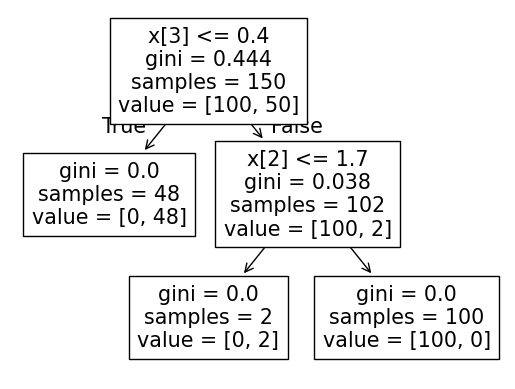

In [14]:
tree.plot_tree(RFSirus.estimators_[0])

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

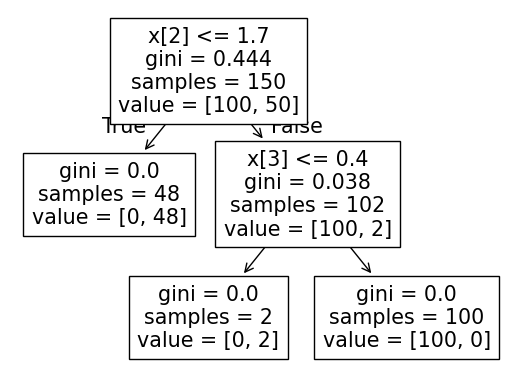

In [15]:
tree.plot_tree(RFSirus.estimators_[800])

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  6
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'R')]]
25 proportions_count_sort :  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Fitting time =  0.003520488739013672 s
Estimated average rate for target class 1 (from 'else' clauses) p_s = 2%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                THEN P(C1)      ELSE P(C1)
------------------------------------------------------
if   petal length <= 1

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.4\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.7\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

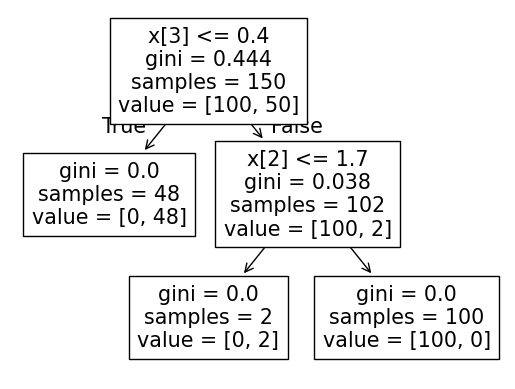

In [23]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])
tree.plot_tree(RFSirus.estimators_[0])

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  6
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R')]]
25 proportions_count_sort :  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Fitting time =  0.0030579566955566406 s
Estimated average rate for target class 1 (from 'else' clauses) p_s = 17%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                     THEN P(C1)      ELSE P(C1)
------------------------------------------------------

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

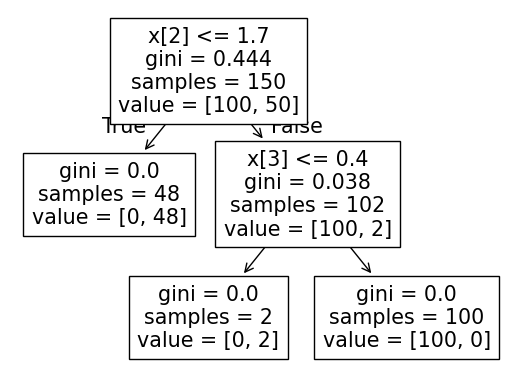

In [17]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])

Fitting time =  0.0018358230590820312 s


[Text(0.5, 0.75, 'x[2] <= 2.45\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]'),
 Text(0.625, 0.5, '  False')]

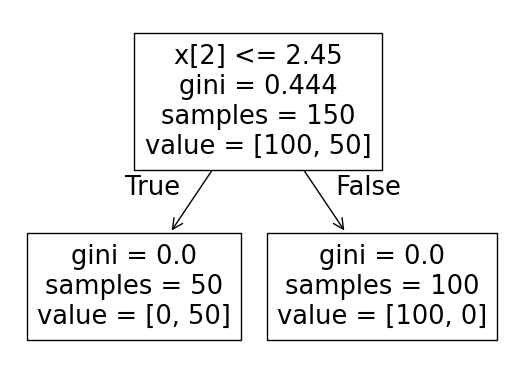

In [18]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

Fitting time =  0.0017833709716796875 s


[Text(0.5, 0.75, 'x[3] <= 0.8\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]'),
 Text(0.625, 0.5, '  False')]

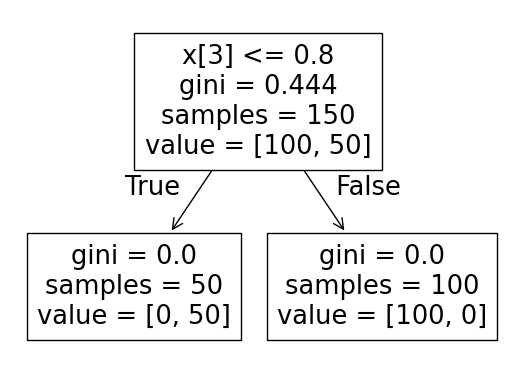

In [19]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

In [20]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  118
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'R')], [(3, 0.4000000059604645, 'L')], [(0, 5.269999980926514, 'R')], [(0, 5.269999980926514, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(0, 4.800000190734863, 'L')], [(0, 4.800000190734863, 'R')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'R')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'L')], [(1, 3.4000000953674316, 'R')], [(1, 3

In [21]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  132
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(0, 5.269999980926514, 'R')], [(0, 5.269999980926514, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(0, 4.800000190734863, 'L')], [(0, 4.800000190734863, 'R')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'L')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'R')], [(0, 5.599999904632568, 'L')], [(0, 5.

## optimizing p0 :

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=True, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
from pysirus.models.optimizer import train_optimal_extractor_p0
from sklearn.metrics import roc_auc_score

In [ ]:
final_sirus_model = train_optimal_extractor_p0(clf=RFSirus,X_train=X,y_train=y,
                           scoring=roc_auc_score,p0_exploration_grid=np.linspace(0.01, 0.05, 15),
                           n_cv_splits=5,n_cv_repeats=5)

In [ ]:
final_sirus_model

In [ ]:
final_sirus_model.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
final_sirus_model.show_rules(max_rules=16)

## GB : 

In [22]:
## SirusGBClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
#GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
#GBSirus.show_rules(max_rules=16)

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (100, 1)
self.estimators_.shape (

In [23]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
GBSirus.print_rules(max_rules=4)

########
Rules 0 
       &( petal length <= 1.7000000476837158 )
########
Rules 1 
       &( petal width <= 0.4000000059604645 )
########
Rules 2 
       &( sepal width <= 3.4000000953674316 )
########
Rules 3 
       &( petal length <= 1.399999976158142 )


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.4\nfriedman_mse = 0.222\nsamples = 150\nvalue = 0.0'),
 Text(0.2, 0.5, 'friedman_mse = -0.0\nsamples = 48\nvalue = 3.0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.019\nsamples = 102\nvalue = -0.314'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 3.0'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -1.5')]

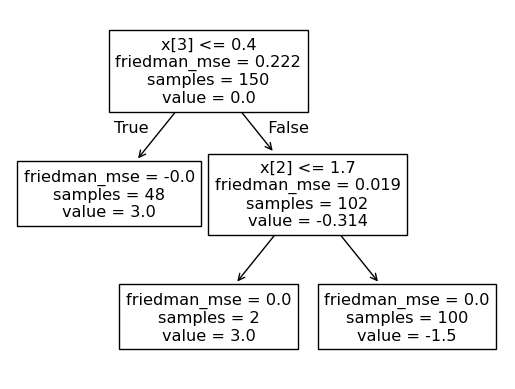

In [24]:
tree.plot_tree(GBSirus.estimators_[0,0])

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.4\nfriedman_mse = 0.179\nsamples = 150\nvalue = -0.002'),
 Text(0.2, 0.5, 'friedman_mse = -0.0\nsamples = 48\nvalue = 2.482'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 1.7\nfriedman_mse = 0.015\nsamples = 102\nvalue = -0.283'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 2.482'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 100\nvalue = -1.43')]

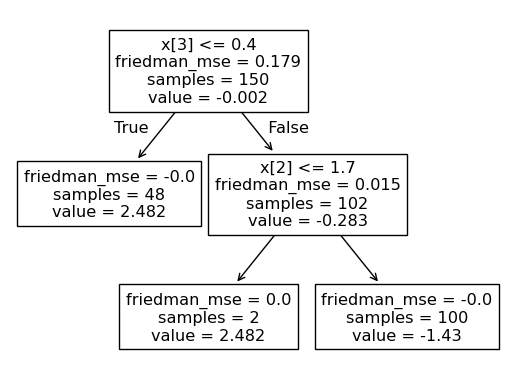

In [26]:
tree.plot_tree(GBSirus.estimators_[1,0])

[Text(0.5, 0.8333333333333334, 'x[2] <= 1.7\nfriedman_mse = 0.145\nsamples = 150\nvalue = -0.002'),
 Text(0.25, 0.5, 'x[1] <= 3.4\nfriedman_mse = 0.0\nsamples = 48\nvalue = 0.536'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 27\nvalue = 2.156'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 21\nvalue = 2.156'),
 Text(0.75, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.013\nsamples = 102\nvalue = -0.256'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 2.156'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 100\nvalue = -1.373')]

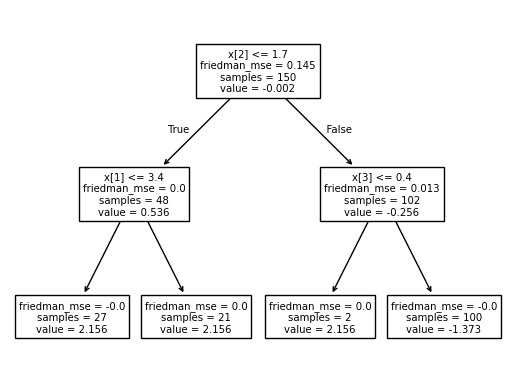

In [27]:
tree.plot_tree(GBSirus.estimators_[2,0])

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\nfriedman_mse = 0.118\nsamples = 150\nvalue = -0.003'),
 Text(0.2, 0.5, 'friedman_mse = -0.0\nsamples = 48\nvalue = 1.932'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.01\nsamples = 102\nvalue = -0.231'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.932'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -1.325')]

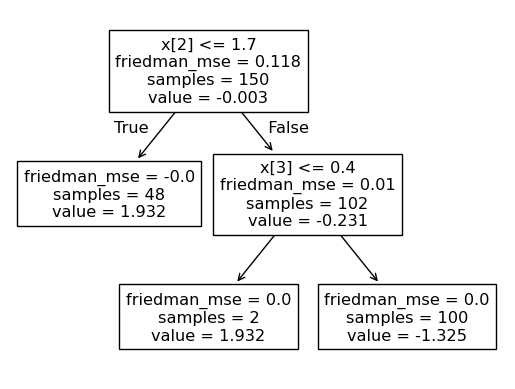

In [29]:
tree.plot_tree(GBSirus.estimators_[3,0])

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\nfriedman_mse = 0.096\nsamples = 150\nvalue = -0.003'),
 Text(0.2, 0.5, 'friedman_mse = 0.0\nsamples = 48\nvalue = 1.768'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.008\nsamples = 102\nvalue = -0.209'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.768'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = -0.0\nsamples = 100\nvalue = -1.285')]

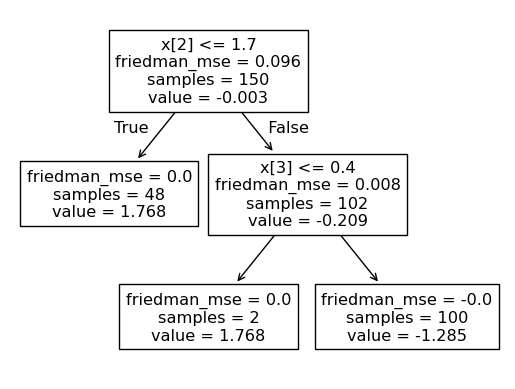

In [30]:
tree.plot_tree(GBSirus.estimators_[4,0])

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\nfriedman_mse = 0.0\nsamples = 150\nvalue = -0.0'),
 Text(0.2, 0.5, 'friedman_mse = -0.0\nsamples = 48\nvalue = 1.0'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\nfriedman_mse = 0.0\nsamples = 102\nvalue = -0.0'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.8, 0.16666666666666666, 'friedman_mse = 0.0\nsamples = 100\nvalue = -1.0')]

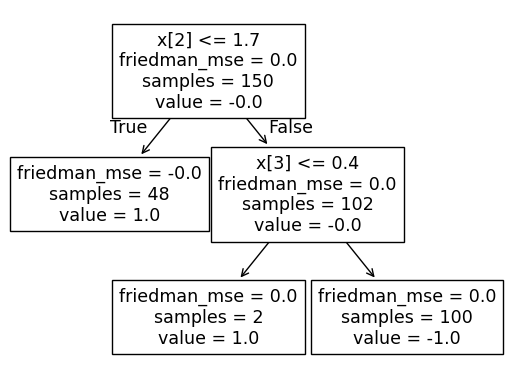

In [34]:
tree.plot_tree(GBSirus.estimators_[99,0])